In [ ]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 213s 12s/step - loss: 0.8582 - accuracy: 0.5335 - val_loss: 0.6077 - val_accuracy: 0.7347
Epoch 2/50
8/8 [==============================] - 61s 8s/step - loss: 0.5390 - accuracy: 0.7573 - val_loss: 0.5259 - val_accuracy: 0.7449
Epoch 3/50
8/8 [==============================] - 61s 8s/step - loss: 0.3826 - accuracy: 0.8268 - val_loss: 0.4427 - val_accuracy: 0.7959
Epoch 4/50
8/8 [==============================] - 61s 8s/step - loss: 0.2329 - accuracy: 0.9166 - val_loss: 0.3625 - val_accuracy: 0.8265
Epoch 5/50
8/8 [==============================] - 60s 8s/step - loss: 0.1459 - accuracy: 0.9494 - val_loss: 0.2903 - val_accuracy: 0.8776
Epoch 6/50
8/8 [==============================] - 61s 8s/step - loss: 0.0840 - accuracy: 0.9697 - val_loss: 0.2782 - val_accuracy: 0.8980
Epoch 7/50
8/8 [==============================] - 71s 9s/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.2107 - val_accuracy: 0.8980
Epoch 8/50
8/8 [================

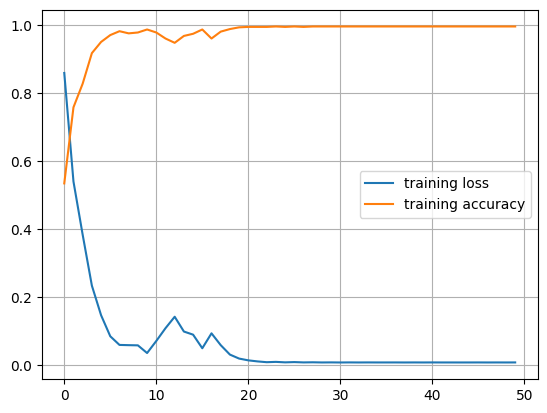

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 8s 2s/step


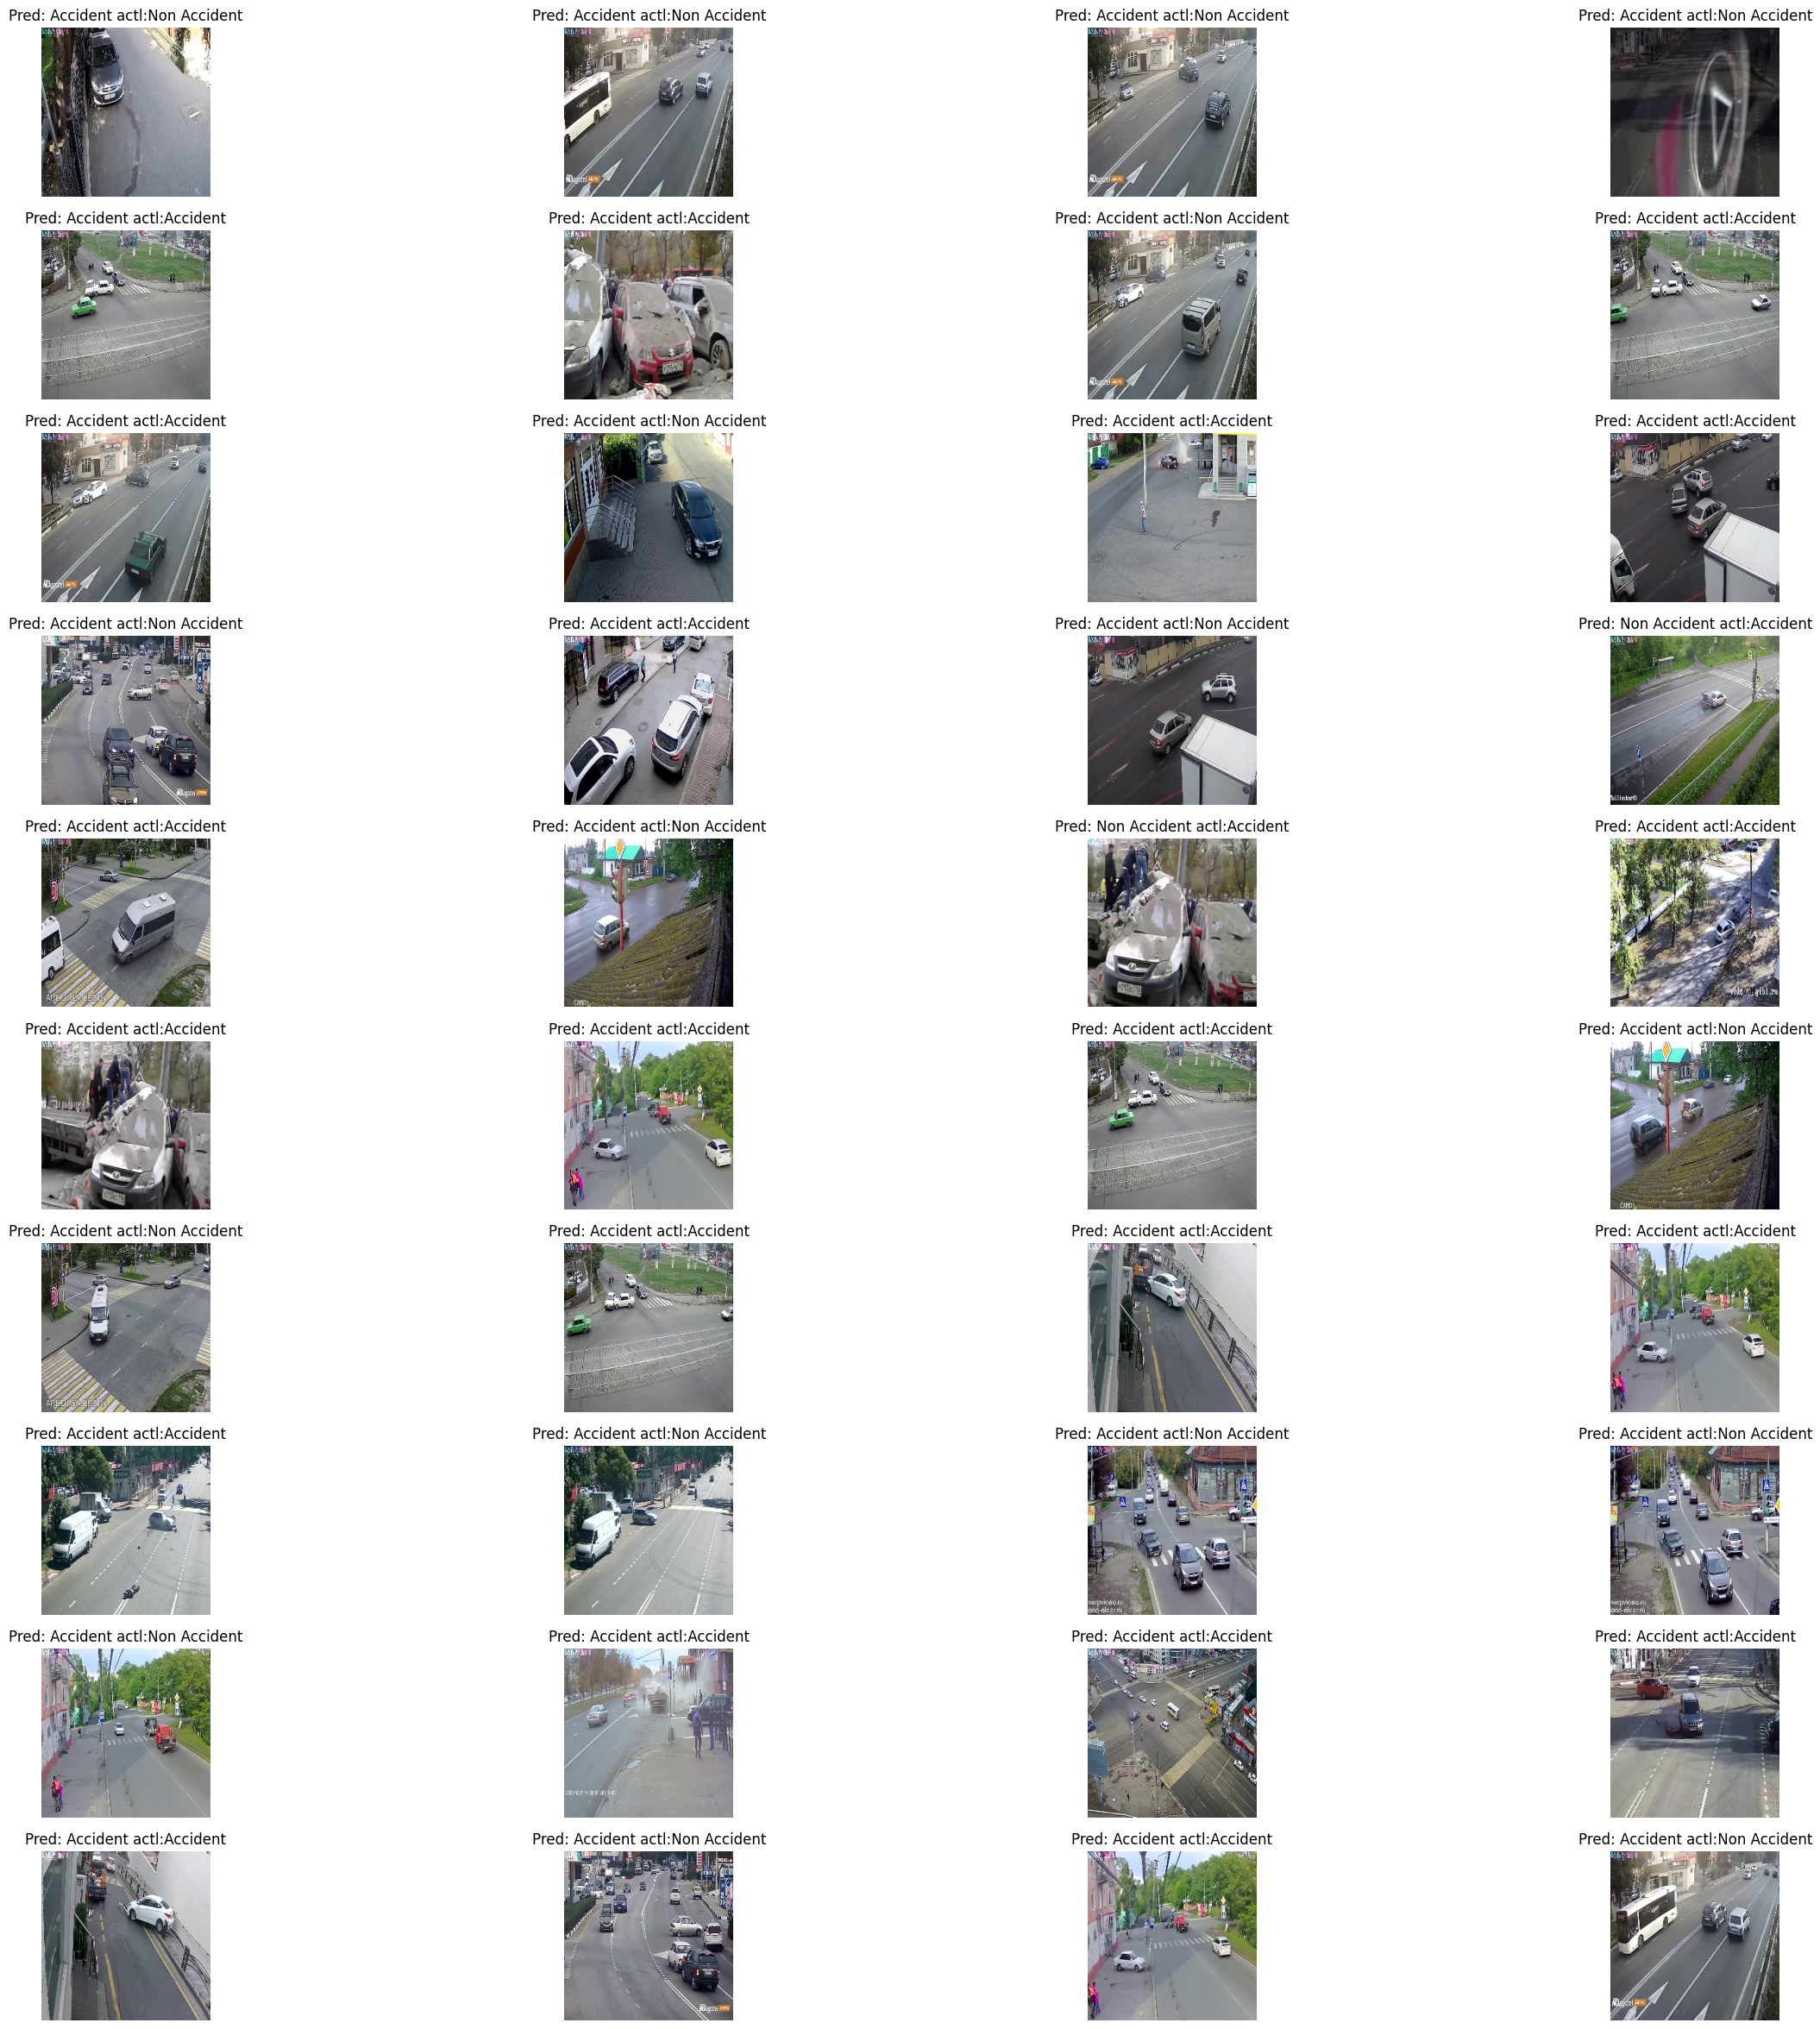

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

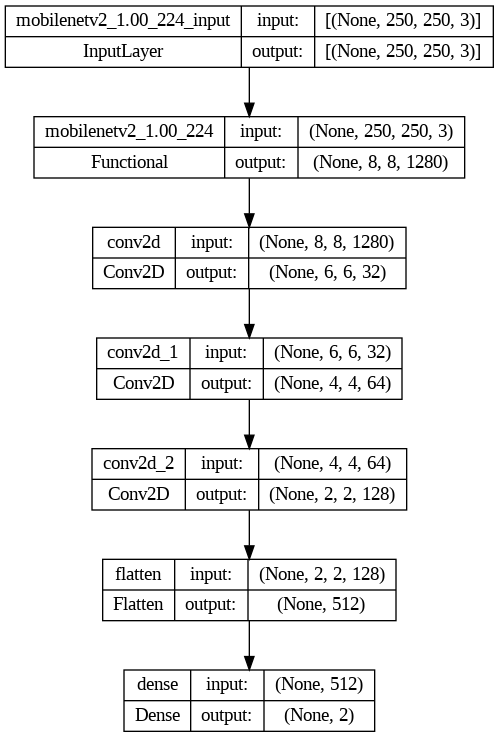

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(class_names)


['Accident', 'Non Accident']
